<center>

# **Assignment 1 - Problem 5**
### Question No.2. NLP Dataset: IMDB-50K Movie Review dataset comprising 50K movie reviews.

## **DL Group 205**

## **Contributors:**
**1. MADHU KANUKULA (2019AB04116)**

**2. PRASHANT KUMAR (2019AB04158)**

**3. ARKAJYOTI MISRA (2019AB04147)**

</Center>

# **1. Import Libraries/Dataset**

In [60]:
!nvidia-smi

Sun May 23 15:03:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    73W / 149W |   2218MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [61]:
!pip install -q tensorflow-hub
!pip install -q tensorflow-datasets

In [62]:
import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.4.1
Eager mode:  True
Hub version:  0.12.0
GPU is available


In [63]:
(train_data, test_data)= tfds.load( 
    name='imdb_reviews',
    split=['train','test'],
    as_supervised=True,
    batch_size=-1
)

reviews, sentiments = tfds.as_numpy(train_data)
reviews_test, sentiments_test = tfds.as_numpy(test_data)

# **2. Data Visualization**

In [64]:
# Print the shapes of train and test data.
print(type(reviews), reviews.shape)
print(type(reviews_test), reviews_test.shape)

print(type(sentiments), sentiments.shape)
print(type(sentiments_test), sentiments_test.shape)

<class 'numpy.ndarray'> (25000,)
<class 'numpy.ndarray'> (25000,)
<class 'numpy.ndarray'> (25000,)
<class 'numpy.ndarray'> (25000,)


In [65]:
# Print at least two movie reviews from each class of the dataset, for a sanity check that labels match the text.

# Note: 0 - Indicates Negative, 1- Indicates Positive

print("Sentiment, Review")
print(sentiments.take(4), reviews.take(4))
print(sentiments.take(14), reviews.take(14))
print(sentiments.take(0),reviews.take(0))
print(sentiments.take(1), reviews.take(1))


Sentiment, Review
1 b'As others have mentioned, all the women that go nude in this film are mostly absolutely gorgeous. The plot very ably shows the hypocrisy of the female libido. When men are around they want to be pursued, but when no "men" are around, they become the pursuers of a 14 year old boy. And the boy becomes a man really fast (we should all be so lucky at this age!). He then gets up the courage to pursue his true love.'
1 b'Hilarious, evocative, confusing, brilliant film. Reminds me of Bunuel\'s L\'Age D\'Or or Jodorowsky\'s Holy Mountain-- lots of strange characters mucking about and looking for..... what is it? I laughed almost the whole way through, all the while keeping a peripheral eye on the bewildered and occasionally horrified reactions of the audience that surrounded me in the theatre. Entertaining through and through, from the beginning to the guts and poisoned entrails all the way to the end, if it was an end. I only wish i could remember every detail. It haunts

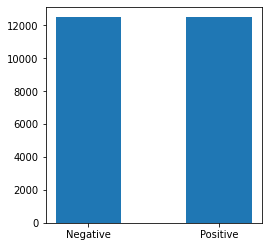

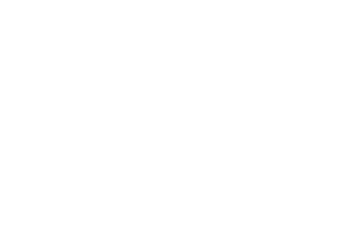

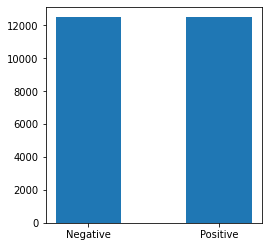

(0.0, 1.0, 0.0, 1.0)

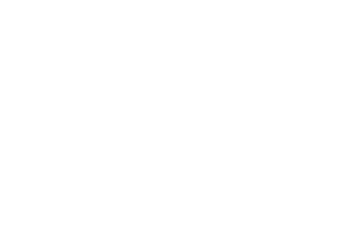

In [66]:
# Plot a bar graph of class distribution in a dataset. Each bar depicts the number of tweets belonging to a particular sentiment.

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,1,1])
x = ['Negative', 'Positive']
y = [sentiments.tolist().count(0), sentiments.tolist().count(1)]
ax.bar(x,y, .5)
plt.show()
plt.axis("off")

fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,1,1])
x = ['Negative', 'Positive']
y = [sentiments_test.tolist().count(0), sentiments_test.tolist().count(1)]
ax.bar(x,y, .5)
plt.show()
plt.axis("off")




# **3. Data Pre-processing**

In [67]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(reviews[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862679,  0.7753425 , -0.07667089,
        -0.15752277,  0.01872335, -0.08169781, -0.3521876 ,  0.4637341 ,
        -0.08492756,  0.07166859, -0.00670817,  0.12686075, -0.19326553,
 

# **4. Model Building**

In [68]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(64,activity_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(32, activity_regularizer=tf.keras.regularizers.l2(0.01),activation='relu'))
model.add(tf.keras.layers.Dense(1,activity_regularizer=tf.keras.regularizers.l2(0.01),activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_6 (Dense)              (None, 64)                3264      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 48,195,977
Trainable params: 48,195,977
Non-trainable params: 0
_________________________________________________________________


# **5. Model Compilation**

In [69]:
model.compile(optimizer= tf.keras.optimizers.Adam(.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# **6. Model Training**

In [70]:
history = model.fit(x=reviews, y=sentiments, epochs=5, validation_split=.2, shuffle=True,  batch_size=128)

Epoch 1/5
157/157 [==============================] - 10s 60ms/step - loss: 0.6762 - accuracy: 0.6359 - val_loss: 0.4048 - val_accuracy: 0.8524
Epoch 2/5
157/157 [==============================] - 9s 57ms/step - loss: 0.3244 - accuracy: 0.9043 - val_loss: 0.3513 - val_accuracy: 0.8744
Epoch 3/5
157/157 [==============================] - 9s 58ms/step - loss: 0.1915 - accuracy: 0.9652 - val_loss: 0.3673 - val_accuracy: 0.8640
Epoch 4/5
157/157 [==============================] - 9s 58ms/step - loss: 0.1228 - accuracy: 0.9862 - val_loss: 0.3997 - val_accuracy: 0.8570
Epoch 5/5
157/157 [==============================] - 9s 57ms/step - loss: 0.0860 - accuracy: 0.9966 - val_loss: 0.4194 - val_accuracy: 0.8556


# **7. Model Evaluation**

In [71]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 0.08362969011068344
Final training accuracy  0.9962999820709229


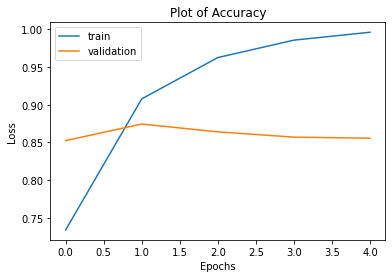

In [72]:
# plot the training  accuracy  

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

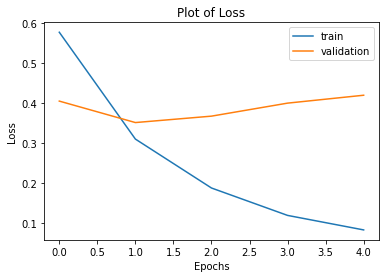

In [73]:
# plot the traininig loss 

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

In [74]:
testLoss, testAccuracy = model.evaluate(test_data, sentiments_test, batch_size=128)

196/196 [==============================] - 2s 12ms/step - loss: 0.4561 - accuracy: 0.8424


In [75]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.4560566544532776
Testing accuracy  0.8424400091171265


In [76]:
y_pred = model.predict(reviews_test, batch_size=128)
predicted_categories = np.uint8(tf.math.round(y_pred))

In [77]:
true_categories = sentiments_test

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(predicted_categories, true_categories)

array([[10696,  2135],
       [ 1804, 10365]])

In [79]:
print(classification_report(sentiments_test, predicted_categories,  [0,1], zero_division=1))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84     12500
           1       0.85      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [80]:
print("miss classified label index, predicted_label, actual_label")
for i in range(10):
  if(predicted_categories[i] != sentiments_test[i]):
    print('predicted incorrectly: ', i, predicted_categories[i], sentiments_test[i])
  else:
    print('predicted correctly: ', i, predicted_categories[i], sentiments_test[i])


miss classified label index, predicted_label, actual_label
predicted correctly:  0 [1] 1
predicted incorrectly:  1 [0] 1
predicted correctly:  2 [0] 0
predicted correctly:  3 [0] 0
predicted correctly:  4 [1] 1
predicted correctly:  5 [1] 1
predicted correctly:  6 [1] 1
predicted correctly:  7 [1] 1
predicted incorrectly:  8 [1] 0
predicted correctly:  9 [1] 1


In [91]:
## postive review predicted as negative

reviews_test[1]

b"A blackly comic tale of a down-trodden priest, Nazarin showcases the economy that Luis Bunuel was able to achieve in being able to tell a deeply humanist fable with a minimum of fuss. As an output from his Mexican era of film making, it was an invaluable talent to possess, with little money and extremely tight schedules. Nazarin, however, surpasses many of Bunuel's previous Mexican films in terms of the acting (Francisco Rabal is excellent), narrative and theme.<br /><br />The theme, interestingly, is something that was explored again in Viridiana, made three years later in Spain. It concerns the individual's struggle for humanity and altruism amongst a society that rejects any notion of virtue. Father Nazarin, however, is portrayed more sympathetically than Sister Viridiana. Whereas the latter seems to choose charity because she wishes to atone for her (perceived) sins, Nazarin's whole existence and reason for being seems to be to help others, whether they (or we) like it or not. Th

In [92]:
## Negative review predicted as Positive

reviews_test[8]

b'As long as you keep in mind that the production of this movie was a copyright ploy, and not intended as a serious release, it is actually surprising how not absolutely horrible it is. I even liked the theme music.<br /><br />And if ever a flick cried out for a treatment by Joel (or Mike) and the MST3K Bots, this is it! Watch this with a bunch of smart-ass wise-crackers, and you\'re in for a good time. Have a brew, butter up some large pretzels, and enjoy.<br /><br />Of course, obtaining a copy requires buying a bootleg or downloading it as shareware, but if you\'re here on the IMDb, then you\'re most likely savvy enough to do so. Good luck.<br /><br />And look for my favorite part....where Dr. Doom informs the FF that they have 12 hours to comply with his wishes....and he actually gestures the number "12" with his finger while doing so....it\'s like "Evil Sesame Street"....hoo boy.<br /><br />...and of course Mrs. Storm declaring "Just look at you....the Fanstastic Four" is just so h

In [83]:

## negative review predicted as negative
reviews_test[2]

b'Scary Movie 1-4, Epic Movie, Date Movie, Meet the Spartans, Not another Teen Movie and Another Gay Movie. Making "Superhero Movie" the eleventh in a series that single handily ruined the parody genre. Now I\'ll admit it I have a soft spot for classics such as Airplane and The Naked Gun but you know you\'ve milked a franchise so bad when you can see the gags a mile off. In fact the only thing that might really temp you into going to see this disaster is the incredibly funny but massive sell-out Leslie Neilson.<br /><br />You can tell he needs the money, wither that or he intends to go down with the ship like a good Capitan would. In no way is he bringing down this genre but hell he\'s not helping it. But if I feel sorry for anybody in this film its decent actor Drake Bell who is put through an immense amount of embarrassment. The people who are put through the largest amount of torture by far however is the audience forced to sit through 90 minutes of laughless bile no funnier than he

# **Hyperparameter Tuning**

## **1. Optimiser: Use a different optimizer with the appropriate LR value**

In [84]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(64,activity_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(32, activity_regularizer=tf.keras.regularizers.l2(0.01),activation='relu'))
model.add(tf.keras.layers.Dense(1,activity_regularizer=tf.keras.regularizers.l2(0.01),activation='sigmoid'))

model.compile(optimizer= tf.keras.optimizers.SGD(.1),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

h1 = model.fit(x=reviews, y=sentiments, epochs=5, validation_split=.2, shuffle=True,  batch_size=128)


Epoch 1/5
157/157 [==============================] - 4s 19ms/step - loss: 0.5985 - accuracy: 0.7710 - val_loss: 0.4021 - val_accuracy: 0.8520
Epoch 2/5
157/157 [==============================] - 3s 18ms/step - loss: 0.1582 - accuracy: 0.9866 - val_loss: 0.3938 - val_accuracy: 0.8574
Epoch 3/5
157/157 [==============================] - 3s 17ms/step - loss: 0.1056 - accuracy: 0.9963 - val_loss: 0.4096 - val_accuracy: 0.8574
Epoch 4/5
157/157 [==============================] - 3s 18ms/step - loss: 0.0870 - accuracy: 0.9975 - val_loss: 0.4277 - val_accuracy: 0.8550
Epoch 5/5
157/157 [==============================] - 3s 18ms/step - loss: 0.0772 - accuracy: 0.9986 - val_loss: 0.4282 - val_accuracy: 0.8568


Final training loss 	 0.07550277560949326
Final training accuracy  0.9986000061035156


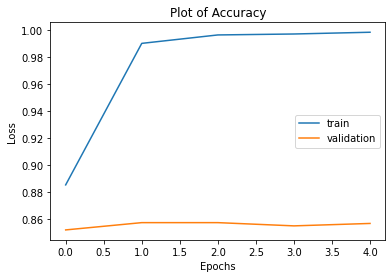

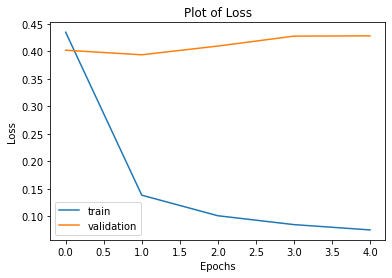

500/500 [==============================] - 4s 7ms/step - loss: 0.4700 - accuracy: 0.8423
Testing loss 	 0.4700017273426056
Testing accuracy  0.8423200249671936


In [85]:
print('Final training loss \t', h1.history['loss'][-1])
print('Final training accuracy ', h1.history['accuracy'][-1])

# plot the training  accuracy  

plt.plot(h1.history['accuracy'], label='train')
plt.plot(h1.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

# plot the traininig loss 

plt.plot(h1.history['loss'], label='train')
plt.plot(h1.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

# testing the model

testLoss, testAccuracy = model.evaluate(test_data, sentiments_test, batch_size=50)


print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

y_pred = model.predict(reviews_test, batch_size=128)
predicted_categories = np.uint8(tf.math.round(y_pred))

true_categories = sentiments_test

In [94]:
print(confusion_matrix(predicted_categories, true_categories))



[[10645  2707]
 [ 1855  9793]]


In [95]:

print(classification_report(true_categories, predicted_categories, [0, 1], zero_division=1))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82     12500
           1       0.84      0.78      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



In [87]:
print("miss classified label index, predicted_label, actual_label")
for i in range(10):
  if(predicted_categories[i] != sentiments_test[i]):
    print('predicted incorrectly: ', i, predicted_categories[i], sentiments_test[i])
  else:
    print('predicted correctly: ', i, predicted_categories[i], sentiments_test[i])

miss classified label index, predicted_label, actual_label
predicted correctly:  0 [1] 1
predicted incorrectly:  1 [0] 1
predicted correctly:  2 [0] 0
predicted correctly:  3 [0] 0
predicted correctly:  4 [1] 1
predicted correctly:  5 [1] 1
predicted correctly:  6 [1] 1
predicted correctly:  7 [1] 1
predicted incorrectly:  8 [1] 0
predicted correctly:  9 [1] 1


## **2. Batch Size: Change the value of batch size in model training**

In [88]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(64,activity_regularizer=tf.keras.regularizers.l2(0.01), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(32, activity_regularizer=tf.keras.regularizers.l2(0.01),activation='relu'))
model.add(tf.keras.layers.Dense(1,activity_regularizer=tf.keras.regularizers.l2(0.01),activation='sigmoid'))

model.compile(optimizer= tf.keras.optimizers.Adam(.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

h2 = model.fit(x=reviews, y=sentiments, epochs=5, validation_split=.2, shuffle=True,  batch_size=50)

Epoch 1/5
400/400 [==============================] - 21s 51ms/step - loss: 0.3675 - accuracy: 0.9110 - val_loss: 0.4285 - val_accuracy: 0.8534
Epoch 2/5
400/400 [==============================] - 20s 51ms/step - loss: 0.0966 - accuracy: 0.9964 - val_loss: 0.4567 - val_accuracy: 0.8456
Epoch 3/5
400/400 [==============================] - 20s 51ms/step - loss: 0.0631 - accuracy: 0.9994 - val_loss: 0.4933 - val_accuracy: 0.8464
Epoch 4/5
400/400 [==============================] - 20s 50ms/step - loss: 0.0468 - accuracy: 0.9998 - val_loss: 0.4977 - val_accuracy: 0.8434
Epoch 5/5
400/400 [==============================] - 20s 51ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 0.5108 - val_accuracy: 0.8398


Final training loss 	 0.03617275133728981
Final training accuracy  0.9999499917030334


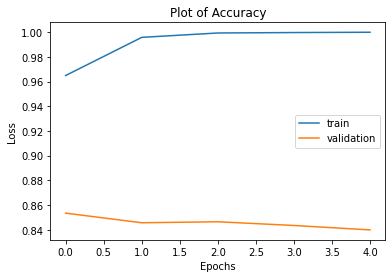

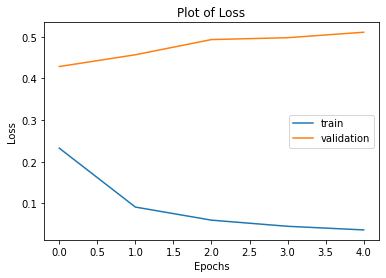

500/500 [==============================] - 4s 8ms/step - loss: 0.5916 - accuracy: 0.8175
Testing loss 	 0.5915611386299133
Testing accuracy  0.817520022392273


In [89]:
print('Final training loss \t', h2.history['loss'][-1])
print('Final training accuracy ', h2.history['accuracy'][-1])

# plot the training  accuracy  

plt.plot(h2.history['accuracy'], label='train')
plt.plot(h2.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

# plot the traininig loss 

plt.plot(h2.history['loss'], label='train')
plt.plot(h2.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

# testing the model

testLoss, testAccuracy = model.evaluate(test_data, sentiments_test, batch_size=50)


print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

y_pred = model.predict(reviews_test, batch_size=128)
predicted_categories = np.uint8(tf.math.round(y_pred))

true_categories = sentiments_test

In [90]:
print("miss classified label index, predicted_label, actual_label")
for i in range(10):
  if(predicted_categories[i] != sentiments_test[i]):
    print('predicted incorrectly: ', i, predicted_categories[i], sentiments_test[i])
  else:
    print('predicted correctly: ', i, predicted_categories[i], sentiments_test[i])

miss classified label index, predicted_label, actual_label
predicted correctly:  0 [1] 1
predicted incorrectly:  1 [0] 1
predicted correctly:  2 [0] 0
predicted correctly:  3 [0] 0
predicted correctly:  4 [1] 1
predicted correctly:  5 [1] 1
predicted correctly:  6 [1] 1
predicted correctly:  7 [1] 1
predicted incorrectly:  8 [1] 0
predicted incorrectly:  9 [0] 1


# **Summary**



## **Observations**



*   **Train Accuracy**: All 3 models are giving 99% training accuracy with optimization and batch size tunning.
*   **Train Loss**: All 3 models have very minimum training loss, in that model3 has very low loss or ignorable.

* When we compare Adam and SGD optimization with this scenario, SGD took more learning rate(0.1) to give same accuracy as Adam(at 0.001).
* **Test accuracy** almost same in three models.
* Observed more **Test Loss** in model3 due to batch size change


